In [166]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [242]:
nt = 50           # number of temperature points
N=8             # size of lattice, N x N
eqsteps = 1000    # number of MC sweeps for equilibration
mcsteps = 1000    # number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt)
Energy, Magnetization, SpecificHeat, Susceptibility = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n=1/(mcsteps*N*N)

In [243]:
state = 2*np.random.randint(2,size=(N,N))-1 
print(state) 

[[-1  1  1  1 -1 -1 -1  1]
 [-1  1 -1 -1  1 -1  1 -1]
 [ 1  1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1  1  1 -1]
 [ 1 -1  1  1  1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1  1  1]
 [-1 -1  1 -1  1 -1  1  1]
 [ 1  1  1  1 -1  1 -1  1]]


In [244]:
delta_E = 2*sig_i*sig_j
print(delta_E)
print(delta_E*Beta)

0
0.0


In [250]:
for t in range(nt):
    Beta = 1/T[t]

    for i in range(eqsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i
    E=0
    M=0
    for i in range(mcsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i

        E += -sig_i*sig_j
        M += np.sum(state)
    
    Energy[t] = n*E
    Magnetization[t] = M*n



In [251]:
Energy

array([-0.06071875, -0.06028125, -0.06      , -0.060125  , -0.05921875,
       -0.0590625 , -0.05996875, -0.05853125, -0.057875  , -0.057875  ,
       -0.0558125 , -0.0546875 , -0.05478125, -0.05390625, -0.05278125,
       -0.05240625, -0.05190625, -0.052     , -0.0486875 , -0.046375  ,
       -0.04990625, -0.04628125, -0.04496875, -0.04334375, -0.04096875,
       -0.04225   , -0.03915625, -0.039375  , -0.03646875, -0.03334375,
       -0.0366875 , -0.0328125 , -0.0329375 , -0.03075   , -0.02903125,
       -0.02878125, -0.03059375, -0.0283125 , -0.02734375, -0.02678125,
       -0.028     , -0.026125  , -0.02559375, -0.02734375, -0.0251875 ,
       -0.025375  , -0.0256875 , -0.0250625 , -0.0238125 , -0.0224375 ])

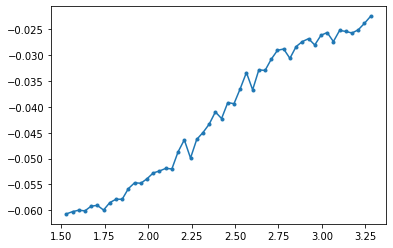

In [252]:
plt.plot(T,Energy,'.-')

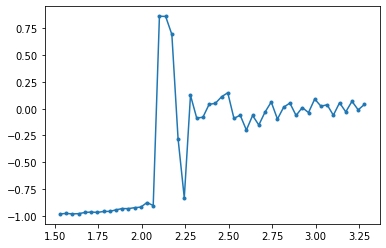

In [253]:
plt.plot(T,Magnetization,'.-')

In [254]:
np.exp(-delta_E*Beta)
print(state)

[[-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1]
 [-1  1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1]]
